<a href="https://colab.research.google.com/github/HEtsub/housing-analysis/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load Data

In [8]:
import seaborn as sns
import pandas as pd

url = "https://raw.githubusercontent.com/HEtsub/housing-analysis/refs/heads/main/zillow_housing_prices.csv?token=GHSAT0AAAAAADK5GEXYMJZVFL3HXEF2BVIY2GMKXMQ"
df = pd.read_csv(url) #load CSV
print (df.shape)
df.head()     #quick check

(895, 312)


,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31
0,102001,0,United States,country,NaN,124908.647735,125128.402089,125400.929845,125985.448387,126658.159150,...,368814.621647,369318.596451,370054.556755,370698.177495,371167.705488,370886.526614,370347.265994,369647.218600,369016.960399,368581.337688
1,394913,1,"New York, NY",msa,NY,223585.344443,224535.456006,225494.367314,227437.492677,229449.666280,...,696496.893216,699358.927813,701202.025855,702309.111458,703633.538661,705372.832637,707867.730823,709680.259587,711192.365254,712393.896616
2,753899,2,"Los Angeles, CA",msa,CA,225639.777055,226479.443314,227597.870765,229823.165684,232256.940692,...,972593.458527,977193.867148,981305.929486,981853.720490,979787.069977,974597.103628,970200.878331,965340.197128,960906.245065,958266.561126
3,394463,3,"Chicago, IL",msa,IL,159124.374736,159271.677552,159552.218361,160250.134174,161089.642950,...,337248.162255,338326.626433,339621.990830,341016.980126,342413.532113,343290.795755,343914.010418,344215.373626,344589.687955,345460.077072
4,394514,4,"Dallas, TX",msa,TX,129889.939824,129947.793257,130014.301701,130187.017143,130414.737725,...,383484.768062,383187.865371,382648.297320,382109.957324,381308.603198,379779.469397,377614.778710,375155.939338,372750.129371,370697.828859


Step 2: Initial Data Exploration

In [9]:
df.info()
df.isnull().sum()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Columns: 312 entries, RegionID to 2025-07-31
dtypes: float64(307), int64(2), object(3)
memory usage: 2.1+ MB


,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30,2025-07-31
count,895.000000,895.000000,431.000000,432.000000,433.000000,435.000000,437.000000,438.000000,439.000000,440.000000,...,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02,8.950000e+02
mean,412099.672626,461.751955,111919.409150,112100.054075,112259.545019,112960.732744,113712.428110,114293.420158,115091.342009,115724.694010,...,2.938082e+05,2.943284e+05,2.952082e+05,2.960120e+05,2.967128e+05,2.967134e+05,2.963733e+05,2.959706e+05,2.956362e+05,2.955711e+05
std,78377.355083,268.710532,47534.368749,47649.293248,47842.990415,48516.099076,49121.996589,49751.170753,50489.837374,51241.282765,...,1.789868e+05,1.791109e+05,1.789766e+05,1.787004e+05,1.784403e+05,1.779942e+05,1.776501e+05,1.771426e+05,1.765429e+05,1.759261e+05
min,102001.000000,0.000000,33800.729634,33795.104227,33778.141102,33741.869438,33724.591757,33721.932000,33800.849694,33921.490343,...,4.765031e+04,4.760161e+04,4.786960e+04,4.861864e+04,5.015528e+04,5.167446e+04,5.205815e+04,5.102623e+04,4.880273e+04,4.620759e+04
25%,394546.000000,230.500000,80861.059481,80919.176130,81012.739482,81402.771089,82051.529162,82585.214010,83024.139302,83414.877767,...,1.848180e+05,1.850010e+05,1.854753e+05,1.863620e+05,1.873311e+05,1.878062e+05,1.876921e+05,1.874177e+05,1.878496e+05,1.883417e+05
50%,394795.000000,460.000000,100869.684080,100984.603642,101043.190423,101372.352354,101593.908331,102026.771987,102449.875804,102991.029824,...,2.439578e+05,2.448427e+05,2.451731e+05,2.466018e+05,2.473092e+05,2.475682e+05,2.476044e+05,2.475720e+05,2.482370e+05,2.484232e+05
75%,395044.500000,689.500000,129791.726185,129314.687749,129747.534873,130375.288253,131085.362601,131516.901068,132178.714153,132754.781052,...,3.489051e+05,3.494591e+05,3.513190e+05,3.528697e+05,3.534044e+05,3.534625e+05,3.523641e+05,3.513519e+05,3.503672e+05,3.507483e+05
max,753929.000000,939.000000,368823.835501,370724.721435,373588.371322,381343.340895,389473.951366,398789.672805,406809.667451,416681.403598,...,1.621637e+06,1.634265e+06,1.647278e+06,1.651677e+06,1.647265e+06,1.635093e+06,1.622762e+06,1.605575e+06,1.587790e+06,1.575749e+06


Step 3: Reshape Data from Wide to Long for Tidier Look

In [10]:
df_long = pd.melt(
    df,
    id_vars=["RegionID",	"SizeRank",	"RegionName", "RegionType",	"StateName"],
    var_name="Date",
    value_name="Price"
)
df_long["Date"] = pd.to_datetime(df_long["Date"])

In [11]:
print (df_long.shape)
df_long.head()

(274765, 7)


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Price
0,102001,0,United States,country,NaN,2000-01-31,124908.647735
1,394913,1,"New York, NY",msa,NY,2000-01-31,223585.344443
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,225639.777055
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,159124.374736
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,129889.939824


Drop duplicated and drop rows where Price is missing

In [12]:
df_long.dropna(subset=["Price"], inplace=True)
df_long.drop_duplicates(inplace=True)


Explore

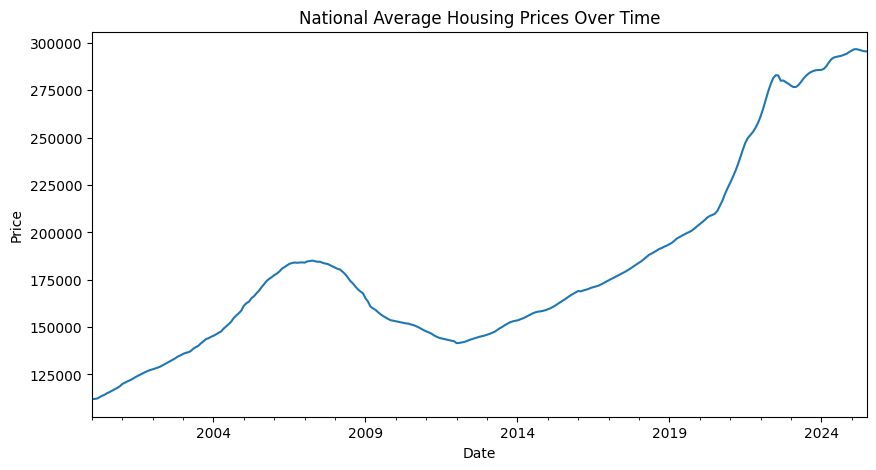

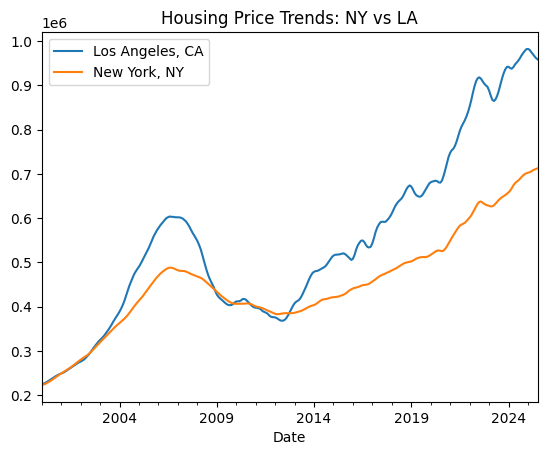

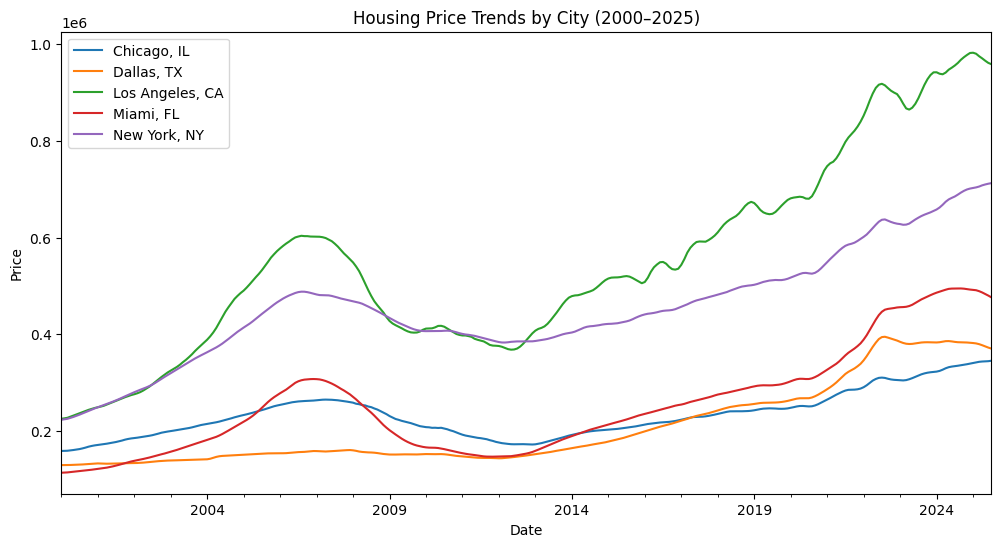

In [13]:
import matplotlib.pyplot as plt

#National average
national_trend = df_long.groupby("Date")["Price"].mean()

plt.figure(figsize=(10,5))
national_trend.plot()
plt.title("National Average Housing Prices Over Time")
plt.ylabel("Price")
plt.show()

#Compare NY vs LA
cities = df_long[df_long["RegionName"].isin(["New York, NY", "Los Angeles, CA"])]
for city, group in cities.groupby("RegionName"):
    group.groupby("Date")["Price"].mean().plot(label=city)

plt.legend()
plt.title("Housing Price Trends: NY vs LA")
plt.show()

#Plotting the big metros together (NY, LA, Chicago, Dallas, Miami)
cities = ["New York, NY", "Los Angeles, CA", "Chicago, IL", "Dallas, TX", "Miami, FL"]
subset = df_long[df_long["RegionName"].isin(cities)]

plt.figure(figsize=(12,6))
for city, group in subset.groupby("RegionName"):
    group.groupby("Date")["Price"].mean().plot(label=city)

plt.legend()
plt.title("Housing Price Trends by City (2000–2025)")
plt.ylabel("Price")
plt.show()


Compute percent change to look at the insights

In [14]:
# Calculate percent change since 2000
baseline = df_long[df_long["Date"] == "2000-01-31"].set_index("RegionName")["Price"]
latest = df_long[df_long["Date"] == "2025-07-31"].set_index("RegionName")["Price"]

growth = ((latest - baseline) / baseline * 100).sort_values(ascending=False)
print(growth.head(10))  # Top 10 fastest growing metros


RegionName
Kapaa, HI                538.721520
Kahului, HI              425.657276
Clewiston, FL            411.959412
Prineville, OR           410.479433
Steamboat Springs, CO    388.386127
Glenwood Springs, CO     379.627972
Ocean City, NJ           354.130244
Vineyard Haven, MA       346.376451
Laconia, NH              341.835738
Bend, OR                 336.926753
Name: Price, dtype: float64


Compare States/Regions

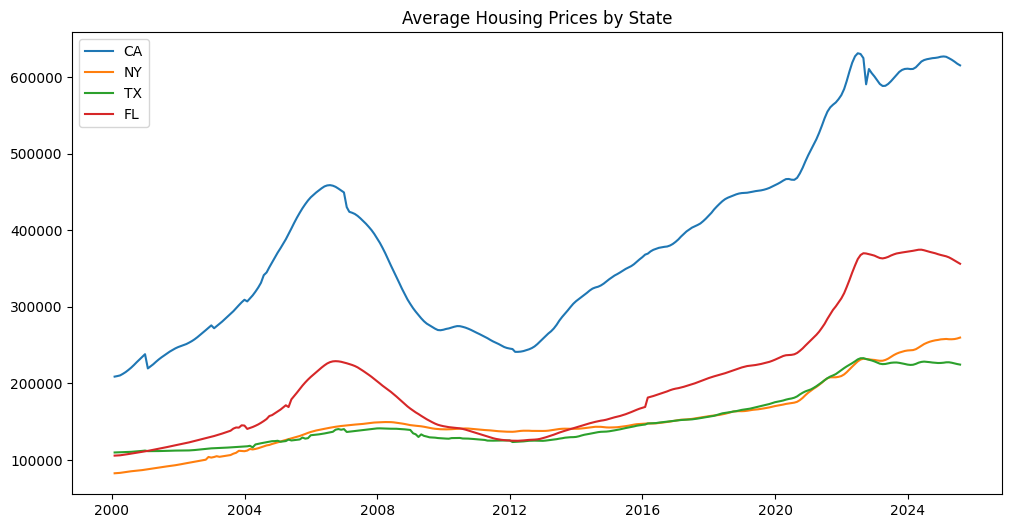

In [15]:
state_trends = df_long.groupby(["StateName", "Date"])["Price"].mean().reset_index()

plt.figure(figsize=(12,6))
for state in ["CA", "NY", "TX", "FL"]:
    state_data = state_trends[state_trends["StateName"] == state]
    plt.plot(state_data["Date"], state_data["Price"], label=state)

plt.legend()
plt.title("Average Housing Prices by State")
plt.show()
